# Prophet results

_This notebook contains all the obtained results. For their imlplementation please refer to the prophet notebook itself. Furthermore please make sure to install ipynb by running:_ `pip install ipynb`


In [10]:
from ipynb.fs.defs.prophet import runExperiment
import matplotlib.pyplot as plt
from statistics import mean
from numpy import load, save

100%|██████████| 50000/50000 [01:53<00:00, 441.52it/s]


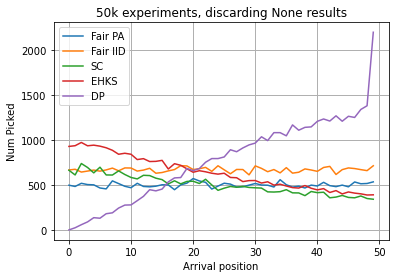

In [11]:
#Plotting the results for 50k experiments

arrivalPositionsChosenFairPA, a = runExperiment(algorithm="FairGeneralProphet", N_experimentReps=50000, 
                                                distribution_type="uniform", n_candidates=50)
    
arrivalPositionsChosenFairIID, b = runExperiment(algorithm="FairIIDProphet", N_experimentReps=50000, 
                                                distribution_type="uniform", n_candidates=50)
    
arrivalPositionsChosenSC, c = runExperiment(algorithm="SC", N_experimentReps=50000, 
                                                distribution_type="uniform", n_candidates=50)
    
arrivalPositionsChosenEHKS, d = runExperiment(algorithm="EHKS", N_experimentReps=50000, 
                                                distribution_type="uniform", n_candidates=50)
arrivalPositionsChosenDP, e = runExperiment(algorithm="DP", N_experimentReps=50000, 
                                                distribution_type="uniform", n_candidates=50)

plt.plot(range(0,50), arrivalPositionsChosenFairPA, label="Fair PA")
plt.plot(range(0,50), arrivalPositionsChosenFairIID, label="Fair IID")
plt.plot(range(0,50), arrivalPositionsChosenSC, label="SC")
plt.plot(range(0,50), arrivalPositionsChosenEHKS, label="EHKS")
plt.plot(range(0,50), arrivalPositionsChosenDP, label="DP")

plt.grid(visible=True, linewidth=1)
plt.rcParams["figure.figsize"] = (8,3)

plt.title("50k experiments, discarding None results")
plt.xlabel("Arrival position")
plt.ylabel("Num Picked")
plt.legend(loc="best")
plt.savefig("images/uniform_distribution/50kExperiments.png")

In [12]:
#Plotting the results for 100k experiments

arrivalPositionsChosenFairPA, a = runExperiment(algorithm="FairGeneralProphet", N_experimentReps=50000*2, 
                                                distribution_type="uniform", n_candidates=50)
    
arrivalPositionsChosenFairIID, b = runExperiment(algorithm="FairIIDProphet", N_experimentReps=50000*2, 
                                                distribution_type="uniform", n_candidates=50)
    
arrivalPositionsChosenSC, c = runExperiment(algorithm="SC", N_experimentReps=50000*2, 
                                                distribution_type="uniform", n_candidates=50)
    
arrivalPositionsChosenEHKS, d = runExperiment(algorithm="EHKS", N_experimentReps=50000*2, 
                                                distribution_type="uniform", n_candidates=50)

arrivalPositionsChosenDP, e = runExperiment(algorithm="DP", N_experimentReps=50000*2, 
                                                distribution_type="uniform", n_candidates=50)

100%|██████████| 100000/100000 [04:33<00:00, 366.07it/s]


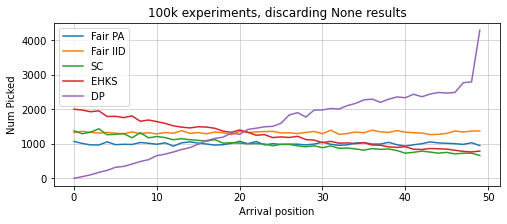

In [13]:
plt.plot(range(0,50), arrivalPositionsChosenFairPA, label="Fair PA")
plt.plot(range(0,50), arrivalPositionsChosenFairIID, label="Fair IID")
plt.plot(range(0,50), arrivalPositionsChosenSC, label="SC")
plt.plot(range(0,50), arrivalPositionsChosenEHKS, label="EHKS")
plt.plot(range(0,50), arrivalPositionsChosenDP, label="DP")
plt.grid(visible=True, linewidth=.5)
plt.title("100k experiments, discarding None results")
plt.xlabel("Arrival position")
plt.ylabel("Num Picked")
plt.legend(loc="best", ncol=1)
plt.savefig("images/uniform_distribution/100kExperiments.png")

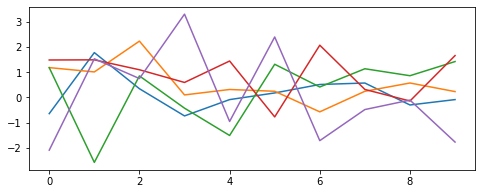

<Figure size 2160x1440 with 0 Axes>

In [14]:
#In order to save the legend
import pylab
fig = pylab.figure()
figlegend = pylab.figure(figsize=(30,20))
ax = fig.add_subplot(111)
lines = ax.plot(range(10), pylab.randn(10), range(10), pylab.randn(10),range(10), pylab.randn(10),range(10), pylab.randn(10),range(10), pylab.randn(10))
figlegend.legend(lines, ('Fair PA', 'Fair IID', 'SC', 'EHKS', "DP/CFHOV"), loc='center', ncol=5)
figlegend.savefig('images/legend.png')

In [15]:
print("The average value of the chosen candidate in the uniform distribution: \n")
print("FairPA: ", mean(a), "(should be 0.501)")
print("FairIID: ", mean(b), "(should be 0.661)")
print("SK: ", mean(c), "(should be 0.499)")
print("EHKS: ", mean(d), "(should be 0.631)")
print("SP: ", mean(e), "(should be 0.751)")

The average value of the chosen candidate in the uniform distribution: 

FairPA:  0.4979676172694542 (should be 0.501)
FairIID:  0.6569075609295104 (should be 0.661)
SK:  0.49444603761404643 (should be 0.499)
EHKS:  0.630810454640881 (should be 0.631)
SP:  0.753904227053262 (should be 0.751)


In [16]:
print("Uniform case, for FairPA")
print("Assuming DP as the 'optimal, but unfair, online algorithm' :", mean(a) / mean(e) *100, "% \n")

print("Uniform case, for FairIID")
print("Assuming DP as the 'optimal, but unfair, online algorithm' :", mean(b) / mean(e) *100, "% \n \n")

## TODO: Later on fix this for the binomial after figuring out DP/CFHOV confusion

print("Binomial case, for FairPA")
print("Assuming DP as the 'optimal, but unfair, online algorithm' :", mean(a) / mean(e) *100, "% \n")

print(" Uniform case, for FairIID")
print("Assuming DP as the 'optimal, but unfair, online algorithm' :", mean(b) / mean(e) *100, "%")



Uniform case, for FairPA
Assuming DP as the 'optimal, but unfair, online algorithm' : 66.05184045934175 % 

Uniform case, for FairIID
Assuming DP as the 'optimal, but unfair, online algorithm' : 87.13408644717694 % 
 

Binomial case, for FairPA
Assuming DP as the 'optimal, but unfair, online algorithm' : 66.05184045934175 % 

 Uniform case, for FairIID
Assuming DP as the 'optimal, but unfair, online algorithm' : 87.13408644717694 %


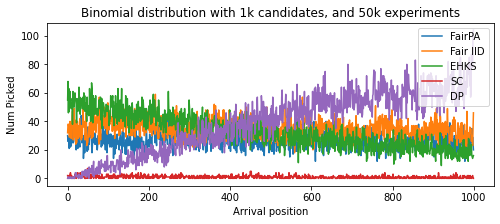

In [27]:
plt.plot(range(0,1000), load('data/FairPA_positions.npy'), label="FairPA")
plt.plot(range(0,1000), load('data/FairIID_positions.npy'), label="Fair IID")
plt.plot(range(0,1000), load('data/SC_positions.npy'), label="SC")
plt.plot(range(0,1000), load('data/EHKS_positions.npy'), label="EHKS")
plt.plot(range(0,1000), load('data/DP_positions.npy'), label="DP")
plt.xlabel("Arrival position")
plt.ylabel("Num Picked")
plt.title("Binomial distribution with 1k candidates, and 50k experiments")
plt.legend(loc="upper right")
plt.savefig("images/binomial_distribution/binomial.png")